In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [11]:
# Load the dataset
try:
    df = pd.read_csv("Datasets/diabetes.csv")
    print("DataFrame successfully loaded!")
except FileNotFoundError:
    print("Error: The file 'diabetes.csv' was not found.")
    df = None

# Display the first few rows of the DataFrame and its information
if df is not None:
    print("\nDataFrame:")
    print(df)
    print("\nDataFrame info:")
    print(df.info())

DataFrame successfully loaded!

DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                     

In [12]:
# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Visualize the decision tree using Graphviz
dot_data = export_graphviz(dtree,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=['Non-Diabetic', 'Diabetic'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", view=False, format='png')

# print a message to the user to let them know the tree has been generated
print("Decision tree visualization has been generated as decision_tree.png")

Decision tree visualization has been generated as decision_tree.png


Decision tree visualization has been saved to 'decision_tree_plot.png'.


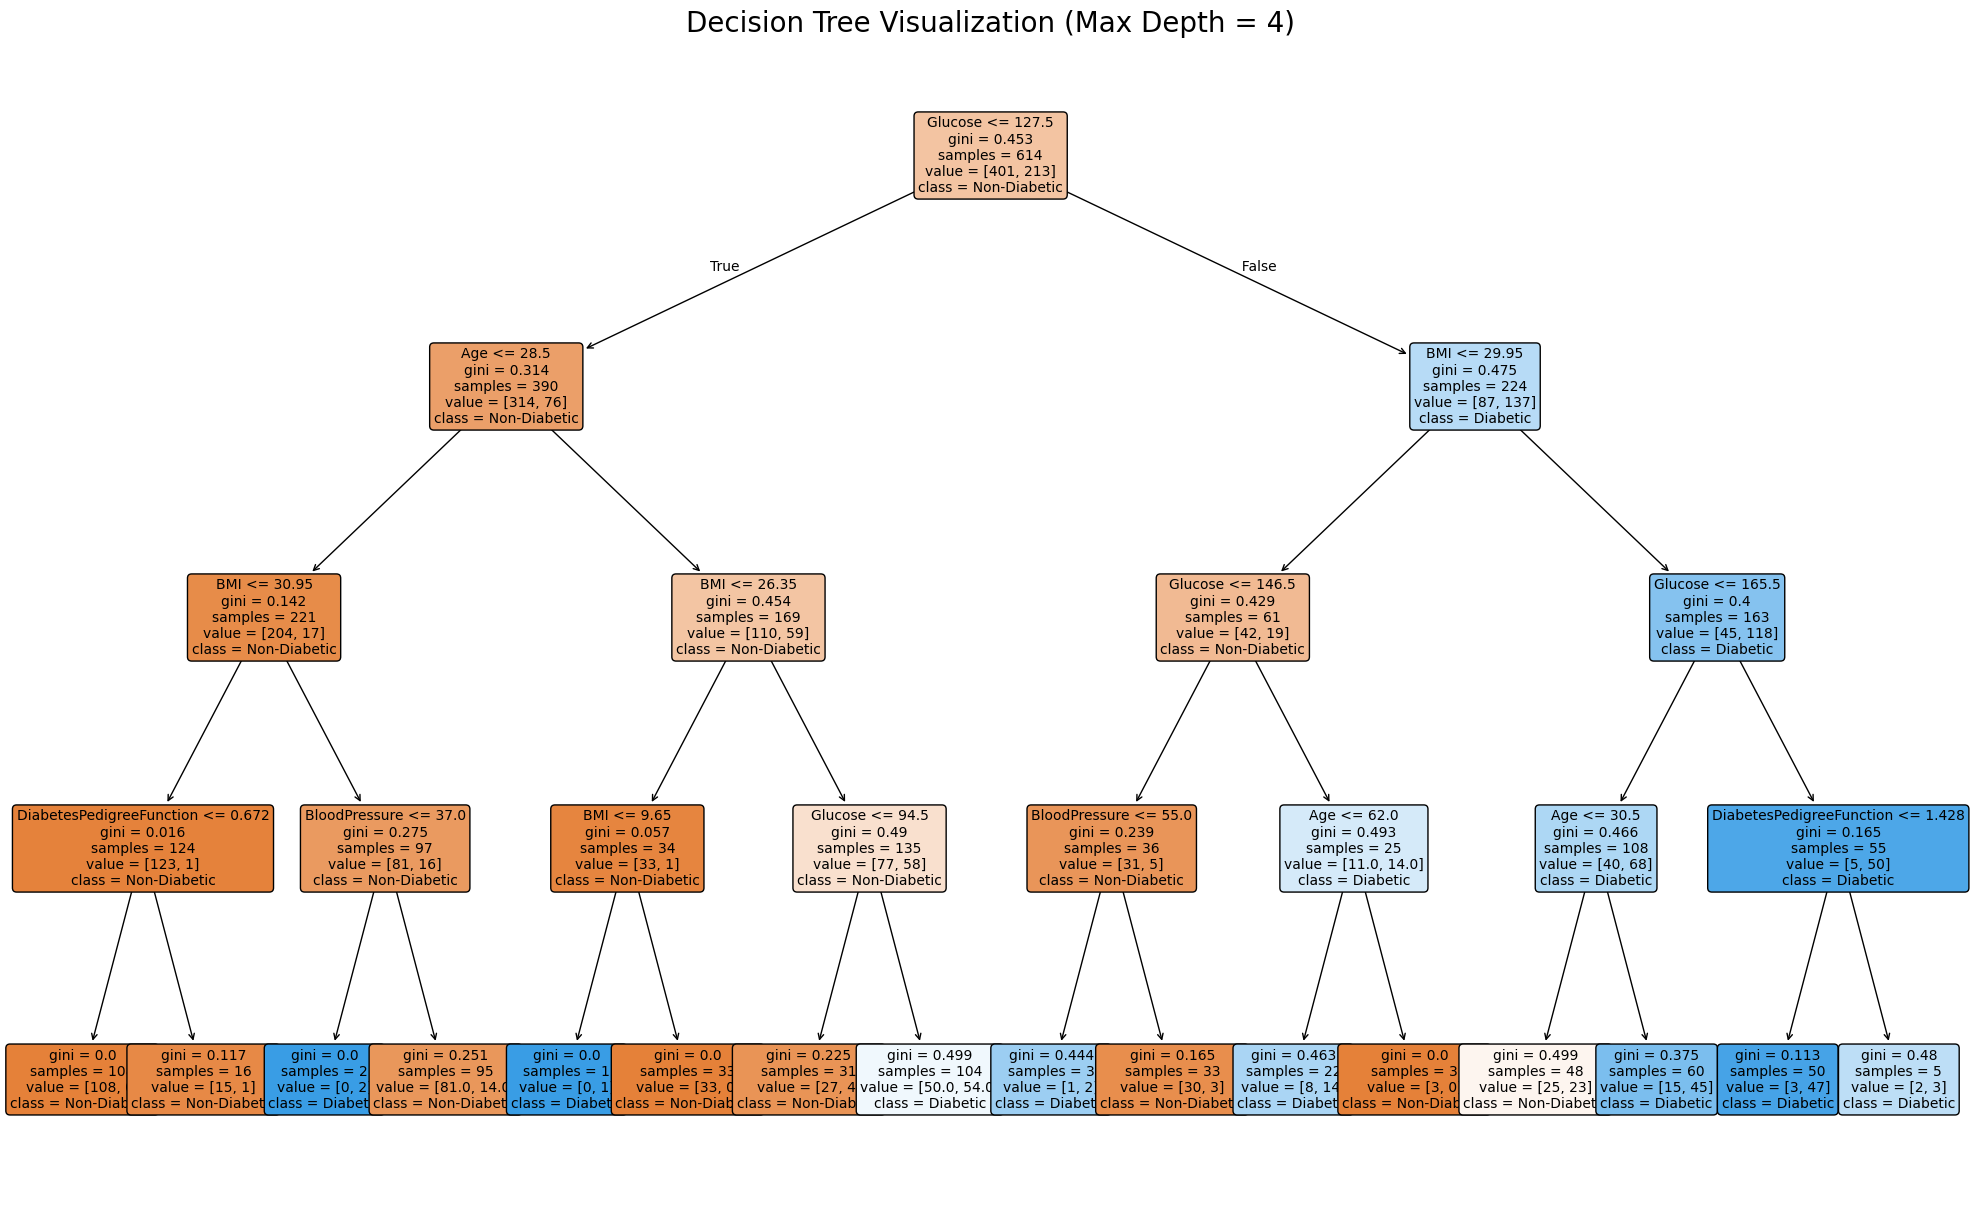

In [13]:
# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier with a max_depth for better visualization
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

# --- Plot Decision Tree using sklearn's plot_tree ---
plt.figure(figsize=(25,15))
plot_tree(dtree,
          feature_names=X.columns,
          class_names=['Non-Diabetic', 'Diabetic'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization (Max Depth = 4)", fontsize=20)
plt.savefig('decision_tree_plot.png')
print("Decision tree visualization has been saved to 'decision_tree_plot.png'.")

## Train random forest classifier


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate random forest and find accuracy for both models.


In [15]:
from sklearn.metrics import accuracy_score

# Make predictions using the trained Random Forest model
y_pred_rf = rf_clf.predict(X_test)

# Calculate Random Forest accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Make predictions using the trained Decision Tree model
y_pred_dt = dtree.predict(X_test)

# Calculate Decision Tree accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracies
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")

Random Forest Classifier Accuracy: 0.7208
Decision Tree Classifier Accuracy: 0.6948


## Analyze feature importance


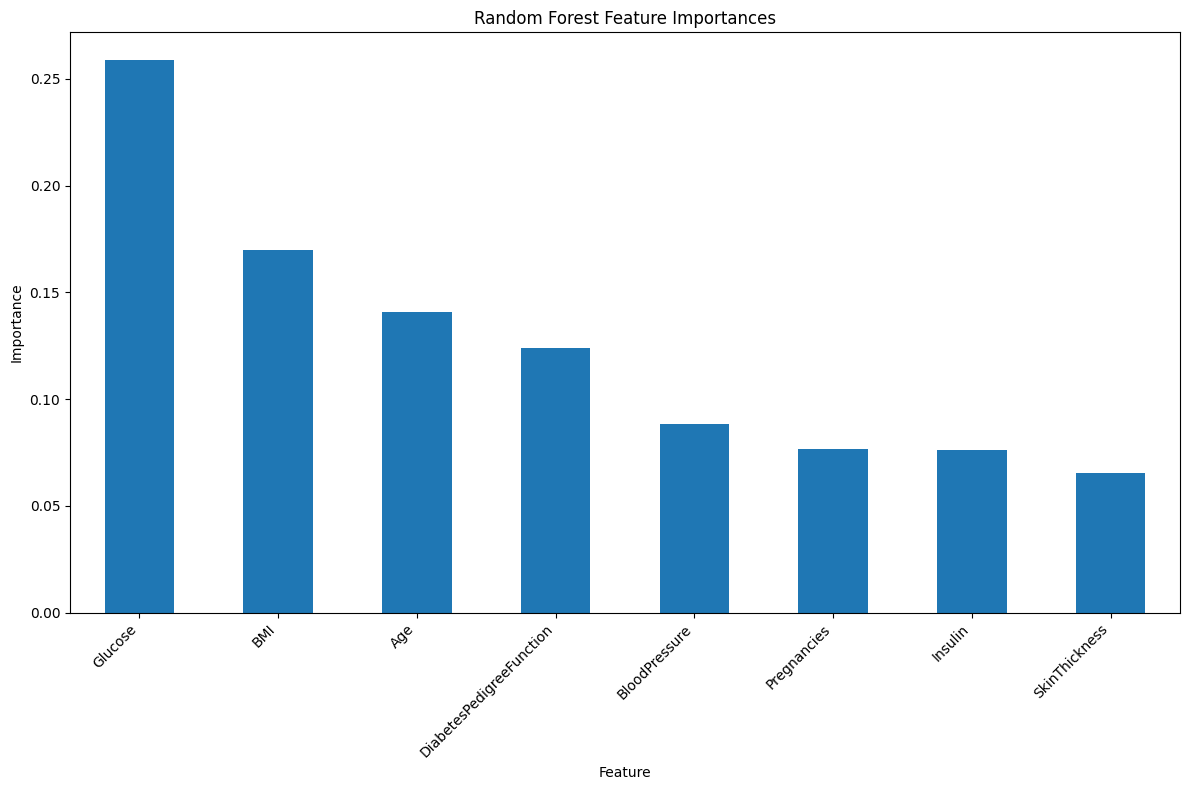

In [16]:
# Get feature importances
feature_importances = rf_clf.feature_importances_

# Create a pandas Series for easier handling and plotting
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sorted_feature_importances.plot(kind='bar')
plt.title('Random Forest Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualize Confusion Matrices

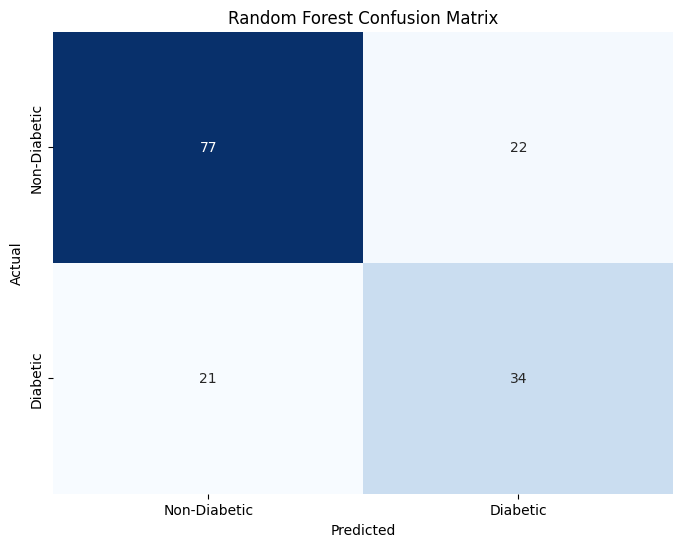

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

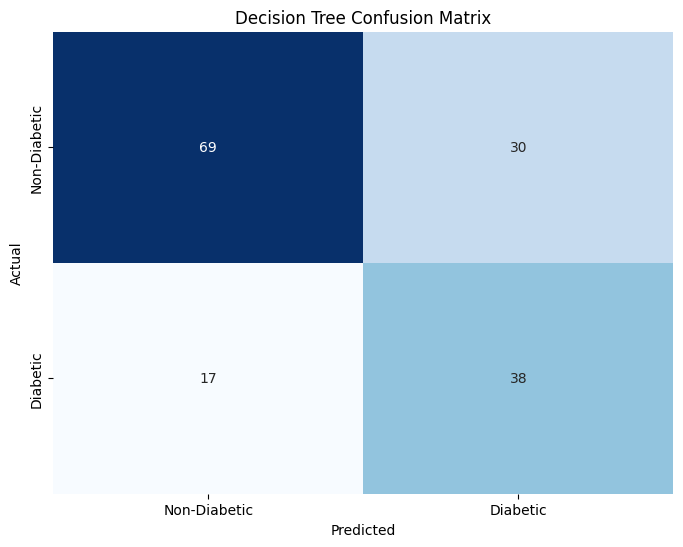

In [18]:
# Generate confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()